# Projeto Data Mining II - Colorectal Cancer

## 1: Import libraries and Data

In [204]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [205]:
# This script downloads a CSV file from a given URL and loads it into a pandas DataFrame.
url = "https://raw.githubusercontent.com/rgerc8/dm2-class-cancer/9bc81e82c839d3a4b14415d5bbd448452adad0f8/DM2%20Project%20Datasets/patient_train_data.csv"
df_original = pd.read_csv(url)
df = df_original.copy()

## 2: Exploratory Data Analysis (EDA) and Data Preprocessing

In [206]:
#df.shape #(75035, 32)
#df.head(5)
#df.tail(5)
#df.describe().T
#df.describe(include = ['O']).T
#df.info()
#df.columns
#df.isna().sum()

In [207]:
index = ['Alcohol Consumption', 'Cancer Stage', 'Country', 'Date of Birth',
       'Diabetes', 'Diabetes History', 'Diet Risk', 'Early Detection',
       'Family History', 'Gender', 'Genetic Mutation', 'Healthcare Access',
       'Healthcare Costs', 'Heart Disease History', 'Hypertension',
       'Incidence Rate per 100K', 'Inflammatory Bowel Disease',
       'Insurance Costs', 'Insurance Status', 'Marital Status',
       'Mortality Rate per 100K', 'Non Smoker', 'Obesity BMI',
       'Physical Activity', 'Screening History', 'Smoking History',
       'Transfusion History', 'Treatment Type', 'Tumor Size (mm)',
       'Urban or Rural', 'Survival Prediction']

for i in index:
    print('#-----------------------------------#')
    print(df[i].unique())
    print(df[i].value_counts())
    print(df[i].isna().sum())

#-----------------------------------#
['No' 'Yes' nan]
Alcohol Consumption
No     37510
Yes    37473
Name: count, dtype: int64
52
#-----------------------------------#
['Localized' 'Regional' 'Metastatic' nan]
Cancer Stage
Regional      29882
Localized     29820
Metastatic    15320
Name: count, dtype: int64
13
#-----------------------------------#
['UK' 'Japan' 'France' 'USA' 'China' 'South Korea' 'Brazil' 'Germany'
 'Canada' 'Pakistan' 'Italy' 'New Zealand' 'South Africa' 'India'
 'Nigeria' 'Australia' nan]
Country
USA             11627
China            7885
Japan            6378
South Korea      6289
Germany          5507
UK               5472
India            4687
France           4685
Brazil           4594
Canada           3971
Italy            3936
Australia        3012
South Africa     2341
Nigeria          1566
Pakistan         1553
New Zealand      1482
Name: count, dtype: int64
50
#-----------------------------------#
['29-01-1966' '21-12-1958' '16-06-1959' ... '14-02-1992' '1

In [208]:
df['Gender']= df['Gender'].replace('P', np.nan)
df['Healthcare Access']= df['Healthcare Access'].replace('?', np.nan)
df['Urban or Rural']= df['Urban or Rural'].replace('urban', 'Urban')
df['Urban or Rural']= df['Urban or Rural'].replace('rural', 'Rural')
df.drop(columns=['ID', 'Marital Status', 'Transfusion History'], inplace=True)

df_no_na = df.dropna()
print("The number of rows in the original insurance dataset is", df.shape[0])
print("The number of rows in the insurance dataset with no missing values is", df_no_na.shape[0])
print("There were", df.shape[0]-df_no_na.shape[0], "rows containing missing values.")
print("The percentage of rows kept is", df_no_na.shape[0]/df.shape[0] * 100, "%.")

The number of rows in the original insurance dataset is 75035
The number of rows in the insurance dataset with no missing values is 73902
There were 1133 rows containing missing values.
The percentage of rows kept is 98.49003798227494 %.


In [210]:
for i in df_no_na.columns:
    print('#-----------------------------------#')
    print(df_no_na[i].unique())
    print(df_no_na[i].value_counts())
    print(df_no_na[i].isna().sum())

#-----------------------------------#
['No' 'Yes']
Alcohol Consumption
No     36977
Yes    36925
Name: count, dtype: int64
0
#-----------------------------------#
['Localized' 'Regional' 'Metastatic']
Cancer Stage
Regional      29428
Localized     29368
Metastatic    15106
Name: count, dtype: int64
0
#-----------------------------------#
['UK' 'Japan' 'France' 'USA' 'China' 'South Korea' 'Brazil' 'Germany'
 'Canada' 'Pakistan' 'Italy' 'New Zealand' 'South Africa' 'India'
 'Nigeria' 'Australia']
Country
USA             11483
China            7774
Japan            6300
South Korea      6196
Germany          5422
UK               5373
France           4628
India            4606
Brazil           4537
Canada           3920
Italy            3871
Australia        2972
South Africa     2308
Nigeria          1533
Pakistan         1523
New Zealand      1456
Name: count, dtype: int64
0
#-----------------------------------#
['29-01-1966' '21-12-1958' '16-06-1959' ... '14-02-1992' '11-07-1978'
 '16

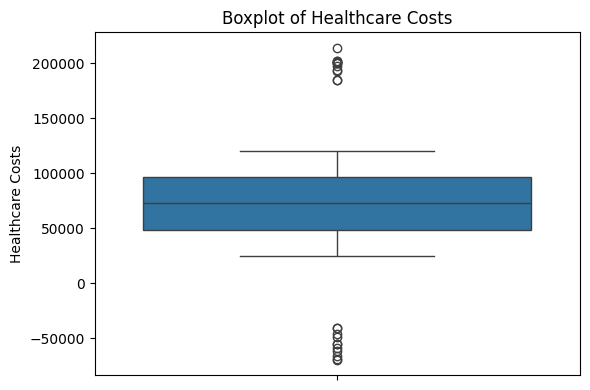

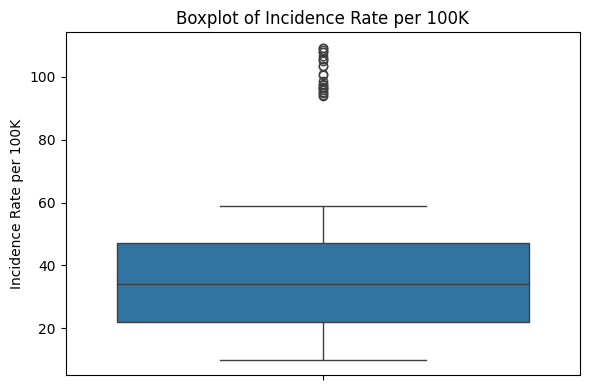

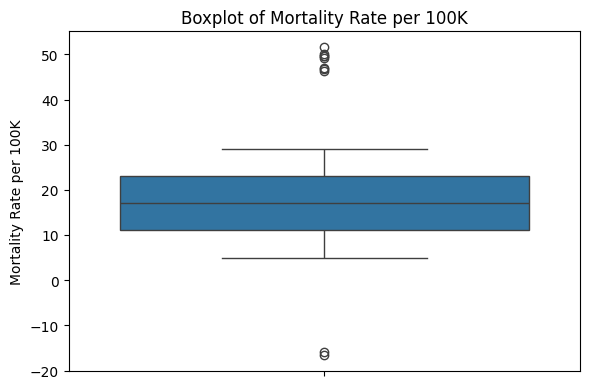

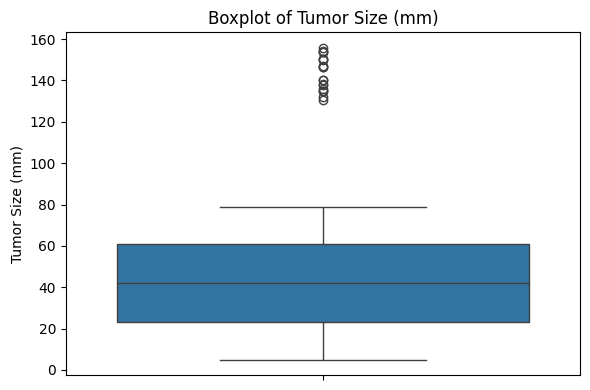

In [211]:
df_no_na_num = df_no_na.select_dtypes(include='number')

for column in df_no_na_num.columns:
    plt.figure(figsize=(6, 4))
    sns.boxplot(y=df_no_na_num[column])
    plt.title(f'Boxplot of {column}')
    plt.tight_layout()
    plt.show()

/var/folders/1p/kt3x4cqj2j38r8f2_d9w8h9c0000gn/T/ipykernel_3438/2603378386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_na['Tumor Size Bin'] = pd.cut(df_no_na['Tumor Size (mm)'], bins=[0, 20, 40, 60, 80, 100], labels=['0–20', '21–40', '41–60', '61–80', '81–100'])


<Axes: xlabel='Tumor Size Bin', ylabel='count'>

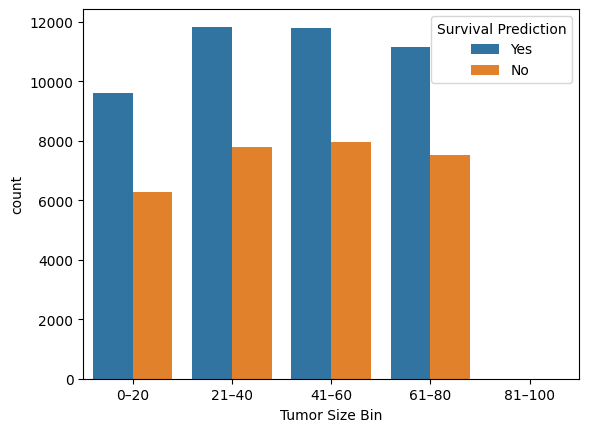

In [212]:
df_no_na['Tumor Size Bin'] = pd.cut(df_no_na['Tumor Size (mm)'], bins=[0, 20, 40, 60, 80, 100], labels=['0–20', '21–40', '41–60', '61–80', '81–100'])
sns.countplot(x='Tumor Size Bin', hue='Survival Prediction', data=df_no_na)

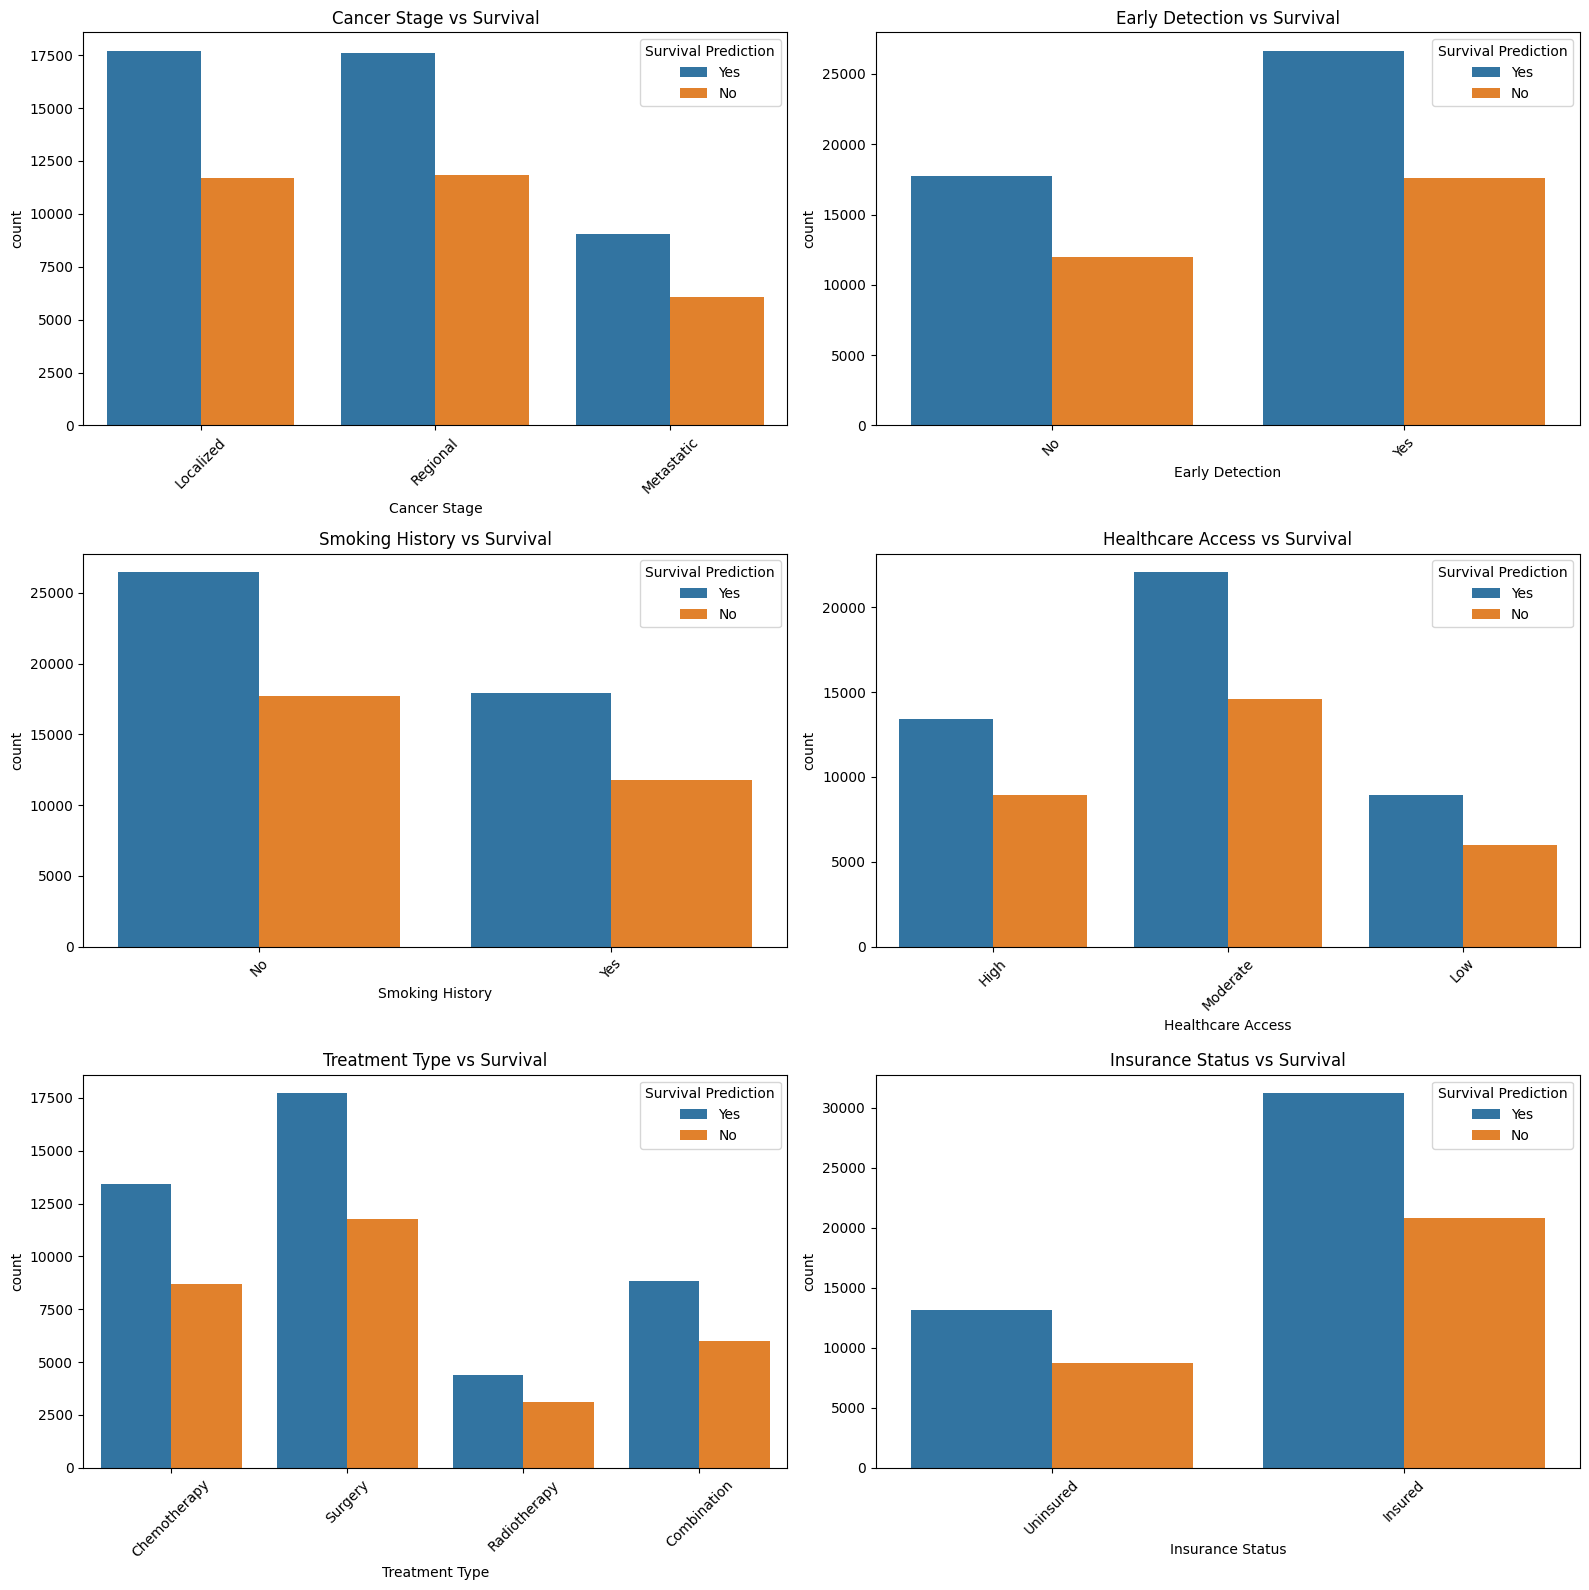

In [213]:
#Set up the figure
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 16))
axes = axes.flatten()

# Plot 1: Cancer Stage vs Survival
sns.countplot(x='Cancer Stage', hue='Survival Prediction', data=df_no_na, ax=axes[0])
axes[0].set_title('Cancer Stage vs Survival')
axes[0].tick_params(axis='x', rotation=45)

# Plot 2: Early Detection vs Survival
sns.countplot(x='Early Detection', hue='Survival Prediction', data=df_no_na, ax=axes[1])
axes[1].set_title('Early Detection vs Survival')
axes[1].tick_params(axis='x', rotation=45)

# Plot 3: Smoking History vs Survival
sns.countplot(x='Smoking History', hue='Survival Prediction', data=df_no_na, ax=axes[2])
axes[2].set_title('Smoking History vs Survival')
axes[2].tick_params(axis='x', rotation=45)

# Plot 4: Healthcare Access vs Survival
sns.countplot(x='Healthcare Access', hue='Survival Prediction', data=df_no_na, ax=axes[3])
axes[3].set_title('Healthcare Access vs Survival')
axes[3].tick_params(axis='x', rotation=45)

# Plot 5: Treatment Type vs Survival
sns.countplot(x='Treatment Type', hue='Survival Prediction', data=df_no_na, ax=axes[4])
axes[4].set_title('Treatment Type vs Survival')
axes[4].tick_params(axis='x', rotation=45)

# Plot 6: Insurance Status vs Survival
sns.countplot(x='Insurance Status', hue='Survival Prediction', data=df_no_na, ax=axes[5])
axes[5].set_title('Insurance Status vs Survival')
axes[5].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()


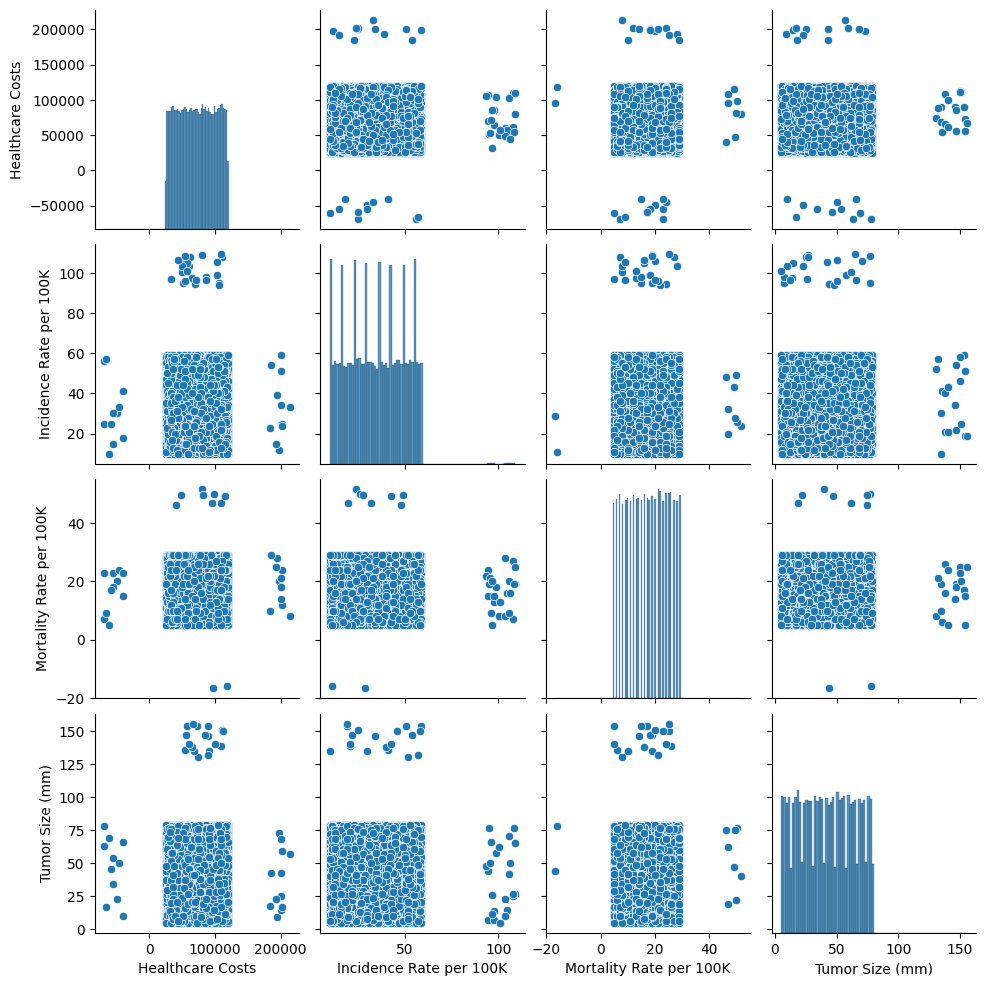

In [214]:
sns.pairplot(data = df_no_na_num)

<Axes: xlabel='Survival Prediction', ylabel='count'>

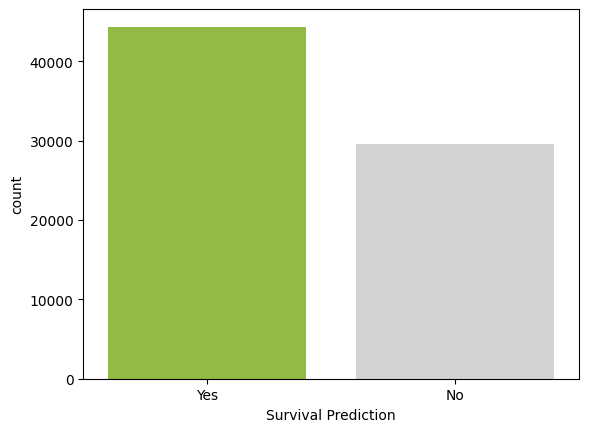

In [215]:
sns.countplot(x='Survival Prediction', data=df_no_na, hue='Survival Prediction', palette=["yellowgreen","lightgrey"], legend=False)

In [216]:
df.skew(numeric_only=True)

Healthcare Costs          -0.001733
Incidence Rate per 100K    0.027104
Mortality Rate per 100K   -0.005866
Tumor Size (mm)            0.021154
dtype: float64

In [217]:
df.kurtosis(numeric_only=True)

Healthcare Costs          -1.086328
Incidence Rate per 100K   -1.075704
Mortality Rate per 100K   -1.158039
Tumor Size (mm)           -1.093692
dtype: float64

<Axes: >

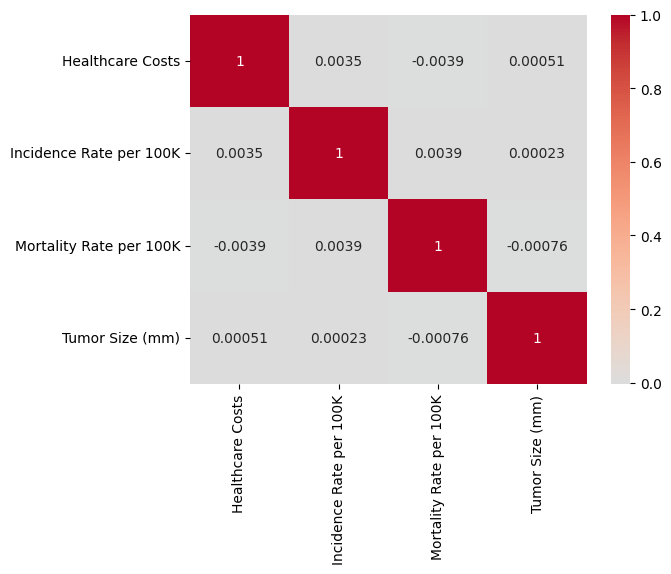

In [218]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, cmap='coolwarm', center=0)


In [219]:
pd.crosstab(df["Cancer Stage"], df["Diabetes History"], margins=True)
df["Cancer Stage"].value_counts()
df["Diabetes History"].value_counts()

Diabetes History
No     75025
Yes       10
Name: count, dtype: int64

In [220]:
df_no_na['Date of Birth'].min(), df_no_na['Date of Birth'].max()

('01-01-1936', '31-12-1992')

## 3: Feature Selection